In [17]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np


In [18]:
def LeakyForwardEulerSolver(N, S_initial, I_initial, R_initial, V_initial, Beta, Gamma, VE):
    
    # Set x limit
    tRange = 600
    
    
    dt = 0.01
    
    S = [S_initial]
    I = [I_initial]
    R = [R_initial]
    V = [V_initial]
    
    t = [0]
    
    # Find number of steps until you reach xRange and loop through them
    for n in range(int(tRange / dt)):
        
        dS = - Beta * S[n] * I[n] / N
        S_nPlusOne = S[n] + dt * dS
        S.append(S_nPlusOne)
        
        dI = Beta * S[n] * I[n] / N + Beta * V[n] * I[n] / N * (1-VE) - Gamma * I[n]
        I_nPlusOne = I[n] + dt * dI
        I.append(I_nPlusOne)
        
        dR = Gamma * I[n]
        R_nPlusOne = R[n] + dt * dR
        R.append(R_nPlusOne)
        
        dV = -Beta * V[n] * I[n] / N * (1-VE)
        V_nPlusOne = V[n] + dt * dV
        V.append(V_nPlusOne)
        
        t_nPlusOne = t[n] + dt
        t.append(t_nPlusOne)
    return [t,R]

In [19]:
def ANMForwardEulerSolver(N, S_initial, I_initial, R_initial, V_initial, Beta, Gamma, VE):
    
    # Set x limit
    tRange = 600
    
    
    dt = 0.01
    
    S = [S_initial]
    I = [I_initial]
    R = [R_initial]
    V = [V_initial]
    
    t = [0]
    
    # Find number of steps until you reach xRange and loop through them
    for n in range(int(tRange / dt)):
        
        dS = - Beta * S[n] * I[n] / N
        S_nPlusOne = S[n] + dt * dS
        S.append(S_nPlusOne)
        
        dI = Beta * S[n] * I[n] / N  + Beta * V[n] * I[n] / N - Gamma * I[n]
        I_nPlusOne = I[n] + dt * dI
        I.append(I_nPlusOne)
        
        dR = Gamma * I[n]
        R_nPlusOne = R[n] + dt * dR
        R.append(R_nPlusOne)
        
        dV = -Beta * V[n] * I[n]
        V_nPlusOne = V[n] + dt * dV
        V.append(V_nPlusOne)
        
        t_nPlusOne = t[n] + dt
        t.append(t_nPlusOne)
    return [t,R]

R0=3:
R Leaky Model: 161652.06624993865
R ANM Model: 131844.80054449217
R0=4:
R Leaky Model: 202519.6336867276
R ANM Model: 158156.01301011836
R0=5:
R Leaky Model: 225883.27628628348
R ANM Model: 169294.6678043419


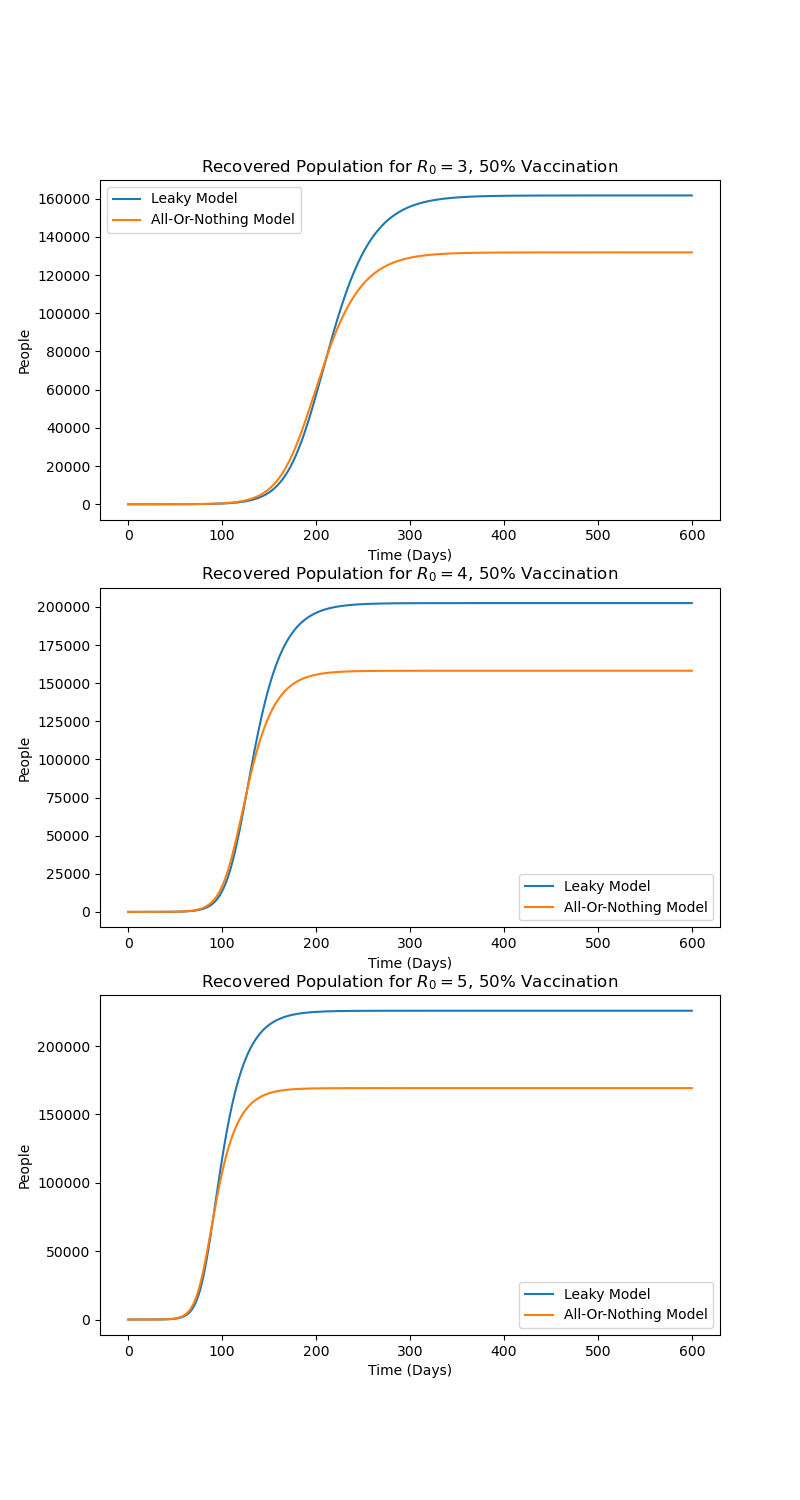

In [20]:
fig, axs = plt.subplots(3, figsize=(8, 15))

N = 300000
VE = 0.8

V_initial_leaky = N/2
S_initial_leaky = (N-V_initial_leaky) - 1
I_initial_leaky = 1
R_initial_leaky = 0

V_initial_anm = (N/2) * (VE)
S_initial_anm = (N-V_initial_anm) - 1
I_initial_anm = 1
R_initial_anm = 0


R_0 = 3

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[0].cla()
axs[0].plot(t0, R_leaky, label='Leaky Model')
axs[0].plot(t0, R_anm, label='All-Or-Nothing Model')
axs[0].set_xlabel("Time (Days)")
axs[0].set_ylabel("People")
axs[0].legend()
axs[0].set_title("Recovered Population for $R_0=3$, 50% Vaccination")

print("R0=3:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

R_0 = 4

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[1].cla()
axs[1].plot(t0, R_leaky, label='Leaky Model')
axs[1].plot(t0, R_anm, label='All-Or-Nothing Model')
axs[1].set_xlabel("Time (Days)")
axs[1].set_ylabel("People")
axs[1].legend()
axs[1].set_title("Recovered Population for $R_0=4$, 50% Vaccination")

print("R0=4:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

R_0 = 5

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[2].cla()
axs[2].plot(t0, R_leaky, label='Leaky Model')
axs[2].plot(t0, R_anm, label='All-Or-Nothing Model')
axs[2].set_xlabel("Time (Days)")
axs[2].set_ylabel("People")
axs[2].legend()
axs[2].set_title("Recovered Population for $R_0=5$, 50% Vaccination")

print("R0=5:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

plt.savefig('problem2Graphs.png')

R0=3:
R Leaky Model: 282156.9197620993
R ANM Model: 282156.9197620993
R0=4:
R Leaky Model: 294061.20703569904
R ANM Model: 294061.20703569904
R0=5:
R Leaky Model: 297912.6957597264
R ANM Model: 297912.6957597264


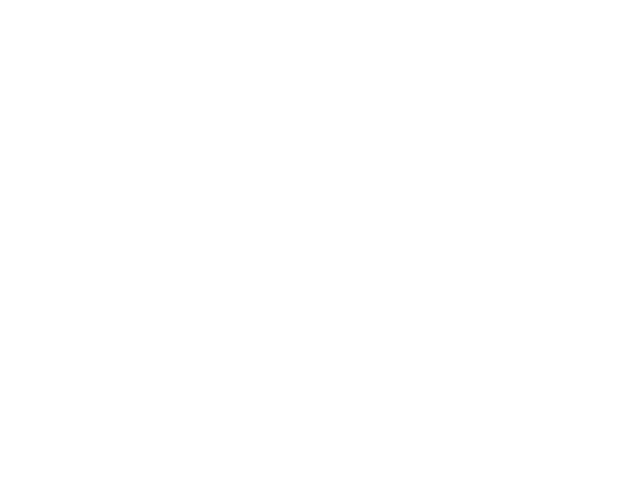

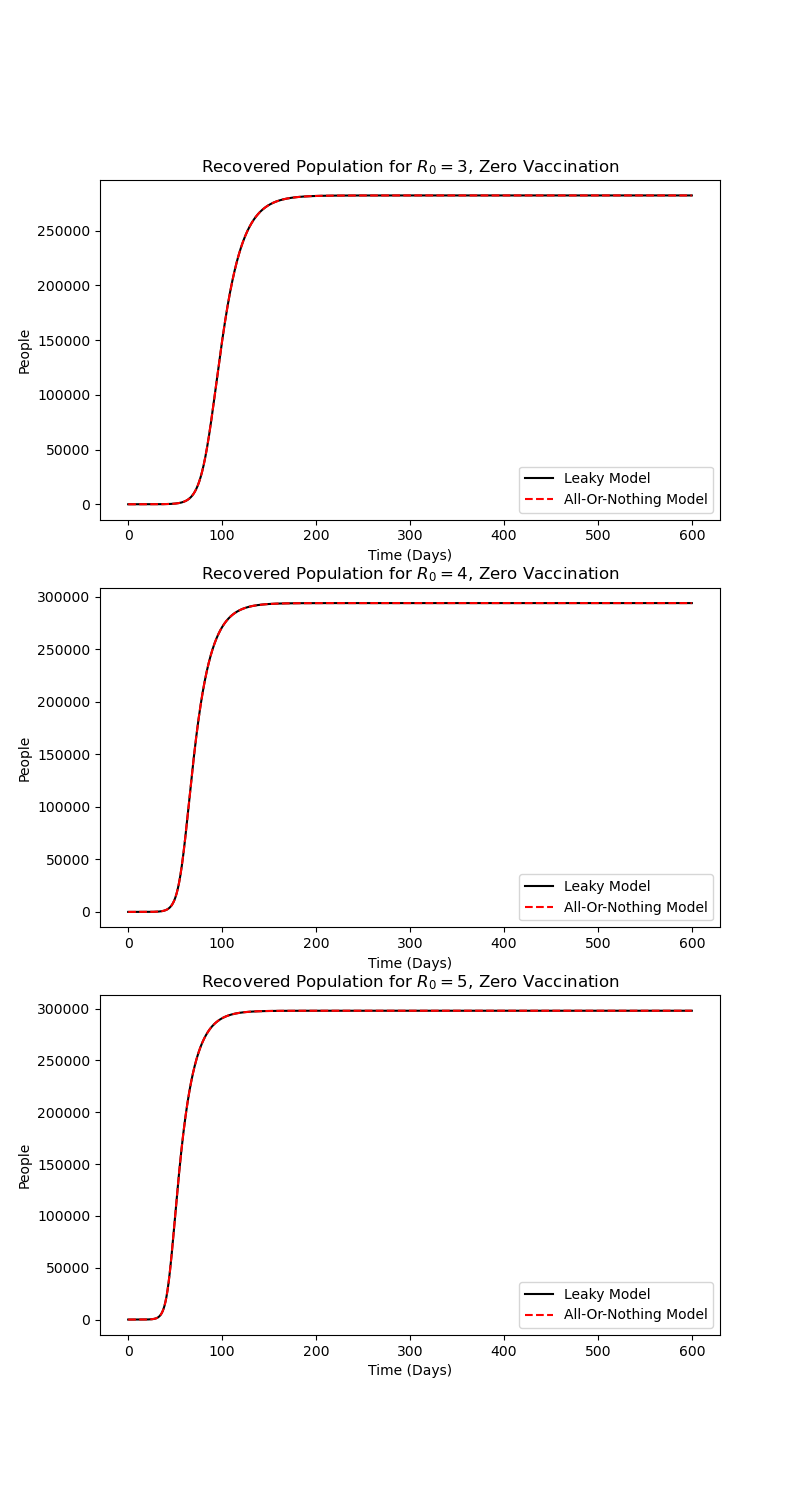

In [21]:
plt.figure(3)
fig, axs = plt.subplots(3, figsize=(8, 15))

N = 300000
VE = 0.8

V_initial_leaky = 0
S_initial_leaky = (N-V_initial_leaky) - 1
I_initial_leaky = 1
R_initial_leaky = 0

V_initial_anm = 0
S_initial_anm = (N-V_initial_anm) - 1
I_initial_anm = 1
R_initial_anm = 0


R_0 = 3

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[0].cla()
axs[0].plot(t0, R_leaky, label='Leaky Model', color='black')
axs[0].plot(t0, R_anm, label='All-Or-Nothing Model', linestyle="--", color='red')
axs[0].set_xlabel("Time (Days)")
axs[0].set_ylabel("People")
axs[0].legend()
axs[0].set_title("Recovered Population for $R_0=3$, Zero Vaccination")

print("R0=3:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

R_0 = 4

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[1].cla()
axs[1].plot(t0, R_leaky, label='Leaky Model', color='black')
axs[1].plot(t0, R_anm, label='All-Or-Nothing Model', linestyle="--", color='red')
axs[1].set_xlabel("Time (Days)")
axs[1].set_ylabel("People")
axs[1].legend()
axs[1].set_title("Recovered Population for $R_0=4$, Zero Vaccination")

print("R0=4:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

R_0 = 5

Gamma = 1/14
Beta = R_0 * Gamma


t0,R_leaky = LeakyForwardEulerSolver(N, S_initial_leaky, I_initial_leaky, R_initial_leaky, V_initial_leaky, Beta, Gamma, VE)
t0,R_anm = ANMForwardEulerSolver(N, S_initial_anm , I_initial_anm , R_initial_anm , V_initial_anm , Beta, Gamma, VE)


axs[2].cla()
axs[2].plot(t0, R_leaky, label='Leaky Model', color='black')
axs[2].plot(t0, R_anm, label='All-Or-Nothing Model', linestyle="--", color='red')
axs[2].set_xlabel("Time (Days)")
axs[2].set_ylabel("People")
axs[2].legend()
axs[2].set_title("Recovered Population for $R_0=5$, Zero Vaccination")

print("R0=5:")
print("R Leaky Model:", max(R_leaky))
print("R ANM Model:", max(R_anm))

plt.savefig('problem2ZeroVaccinatedGraphs.png')